# Top Hit Song Prediction
This is to test the top song prediction.

## Dependecy
Here are the depedency that I'm currently using to helping run the prediction and handling the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde


## Cleaning Data
Before we begin with anything, the data should be cleaned first.

### Remove Missing Data
For High popularity

In [2]:
# Add csv data to songs
high_song_popularity = pd.read_csv("high_popularity_spotify_data.csv")

# Drop useless column
high_song_popularity.drop(columns=['track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url',
                                    'track_id', 'track_album_id', 'type', 'playlist_id'], inplace=True)

# Show the total number of null in each column.
print(high_song_popularity.isnull().sum())

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
time_signature              0
speechiness                 0
track_popularity            0
track_name                  0
track_album_release_date    0
instrumentalness            0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
dtype: int64


For low popularity

In [3]:
# Add csv data to songs
low_song_popularity = pd.read_csv("low_popularity_spotify_data.csv")

# Drop useless column
low_song_popularity.drop(columns=['track_href', 'uri', 'track_album_name', 'playlist_name', 'analysis_url',
                                    'track_id', 'track_album_id', 'type', 'playlist_id'], inplace=True)

# Drop row containing null for time_signature
low_song_popularity = low_song_popularity.dropna(subset='time_signature')

# Show the total number of null in each column.
print(low_song_popularity.isnull().sum())

time_signature              0
track_popularity            0
speechiness                 0
danceability                0
track_artist                0
duration_ms                 0
energy                      0
playlist_genre              0
playlist_subgenre           0
track_name                  0
mode                        0
track_album_release_date    0
id                          0
instrumentalness            0
valence                     0
key                         0
tempo                       0
loudness                    0
acousticness                0
liveness                    0
dtype: int64


## Audio Features
Here is the description of each audio features in the dataset.

-Energy         =   A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. The higher it is the engergetic it is.

-Tempo           =   The speed of a track, measured in beats per minute (BPM).

-Danceability    =   A score describing how suitable a track is for dancing based on tempo, rhythm stability, beat strength and overall regularity.

-Loudness        =   The overall loudness of a track in decibels (dB). Higher values indicate louder tracks overall.

-Liveness        =   The likelihood of a track being performed live. Higher values suggest more audience presence.

-Valence         =   The overall musical positiveness(emotion) of a track. High valence sounds happy; low valence sounds sad or angry.

-Speechiness     =   Measures the presence of spoken words.

-Instrumentalness =   The likelihood a track contains no vocals. Values closer to 1.0 suggest solely instrumental tracks.

-Acousticness    =   A confidence measure of whether a track is acoustic(1) or not(0).

-Mode            =   Indicates the modality of the track.

-Key             =   The musical key, represented as an integer from 0 to 11, mapping to standard Pitch class notation.

-Duration_ms     =   The length of the track in milliseconds.

## Visualization and analyze trends


### Compare The Average Popular and Non-popular Audio Features
This bar chart compares the average values of audio features between popular and non-popular songs. It helps artists understand and be guided by what the average popular song typically sounds like. If a feature has a similar average in both categories, it likely doesn't influence popularity, so the artist can focus on features that show clear differences. The takeaway for this is to consider adjusting your songs to better align with the audio features from the average popular songs.

In [4]:
# Features that are 0. something
normalize_features = ['energy', 'danceability', 'valence', 'acousticness', 'instrumentalness']

# Calculate averages
popularity_average_norm = high_song_popularity[normalize_features].mean()
non_popularity_average_norm = low_song_popularity[normalize_features].mean()

# Tempo
popularity_average_tempo = high_song_popularity['tempo'].mean()
non_popularity_average_tempo = low_song_popularity['tempo'].mean()

# Loudness
popularity_average_loudness = high_song_popularity['loudness'].mean()
non_popularity_average_loudness = low_song_popularity['loudness'].mean()

# Avarage
high_popularity_avg = high_song_popularity['track_popularity'].mean()
low_popularity_avg = low_song_popularity['track_popularity'].mean()

# Max
max_popular_high_popularity = high_song_popularity['track_popularity'].max()
max_popular_low_popularity = low_song_popularity['track_popularity'].max()

# Min
min_popular_high_popularity = high_song_popularity['track_popularity'].min()
min_popular_low_popularity = low_song_popularity['track_popularity'].min()

# Total of number
count_max_popular_high_popularity = (high_song_popularity['track_popularity'] == 100).sum()
count_max_popular_low_popularity = (low_song_popularity['track_popularity'] == 68).sum()

count_min_popular_high_popularity = (high_song_popularity['track_popularity'] == 68).sum()
count_min_popular_low_popularity = (low_song_popularity['track_popularity'] == 11).sum()

# Show
print('popular track for high average popularity:', high_popularity_avg)
print('max popular track for high average popularity:', max_popular_high_popularity)
print('min popular track for high average popularity:', min_popular_high_popularity)
print('features for popularity')
print(popularity_average_norm)

print('popular track for low average popularity:', low_popularity_avg)
print('max popular track for low average popularity:', max_popular_low_popularity)
print('min popular track for low average popularity:', min_popular_low_popularity)
print('features for non popularity')
print(non_popularity_average_norm)

print('the number of high popularity for 68: ', count_min_popular_high_popularity, ' and for low popularity for 68:', count_max_popular_low_popularity)


# Create normalize feature chart
fig_norm = go.Figure(data=[
    go.Bar(name='Popular songs', x=normalize_features, y=popularity_average_norm, marker_color='green'),
    go.Bar(name='Non-popular songs', x=normalize_features, y=non_popularity_average_norm, marker_color='blue')
])

fig_norm.update_layout(
    title='Feature Comparison: Popular vs. Non-Popular Songs',
    xaxis_title='Features',
    yaxis_title='Average (0 - 1 scale)',
    barmode='group',
    template='plotly_dark',
    height=500
)

fig_tempo = go.Figure(data=[
    go.Bar(name='Popular songs', x=['tempo'], y=[popularity_average_tempo], marker_color='green'),
    go.Bar(name='Non-popular songs', x=['tempo'], y=[non_popularity_average_tempo], marker_color='blue')
])

fig_tempo.update_layout(
    title='Feature Comparison: Popular vs. Non-Popular Songs',
    xaxis_title='Feature',
    yaxis_title='Average Tempo Value in BPM',
    barmode='group',
    template='plotly_dark',
    height=500
)

fig_loudness = go.Figure(data=[
    go.Bar(name='Popular songs', x=['loudness'], y=[popularity_average_loudness], marker_color='green'),
    go.Bar(name='Non-popular songs', x=['loudness'], y=[non_popularity_average_loudness], marker_color='blue')
])

fig_loudness.update_layout(
    title='Feature Comparison: Popular vs. Non-Popular Songs',
    xaxis_title='Feature',
    yaxis_title='Average Loudness Value in dB',
    barmode='group',
    template='plotly_dark',
    height=500
)

# Show
fig_norm.show()
fig_tempo.show()
fig_loudness.show()

popular track for high average popularity: 75.80604982206405
max popular track for high average popularity: 100
min popular track for high average popularity: 68
features for popularity
energy              0.667216
danceability        0.650362
valence             0.525737
acousticness        0.221220
instrumentalness    0.041520
dtype: float64
popular track for low average popularity: 43.47709923664122
max popular track for low average popularity: 68
min popular track for low average popularity: 11
features for non popularity
energy              0.543509
danceability        0.607268
valence             0.458438
acousticness        0.405567
instrumentalness    0.286603
dtype: float64
the number of high popularity for 68:  124  and for low popularity for 68: 45


#### Result
From the results, you can see there are clear differences between the average features of popular and non-popular songs. Starting with the least differences: danceability and tempo. The feature with the biggest difference is instrumentalness.

### Genre



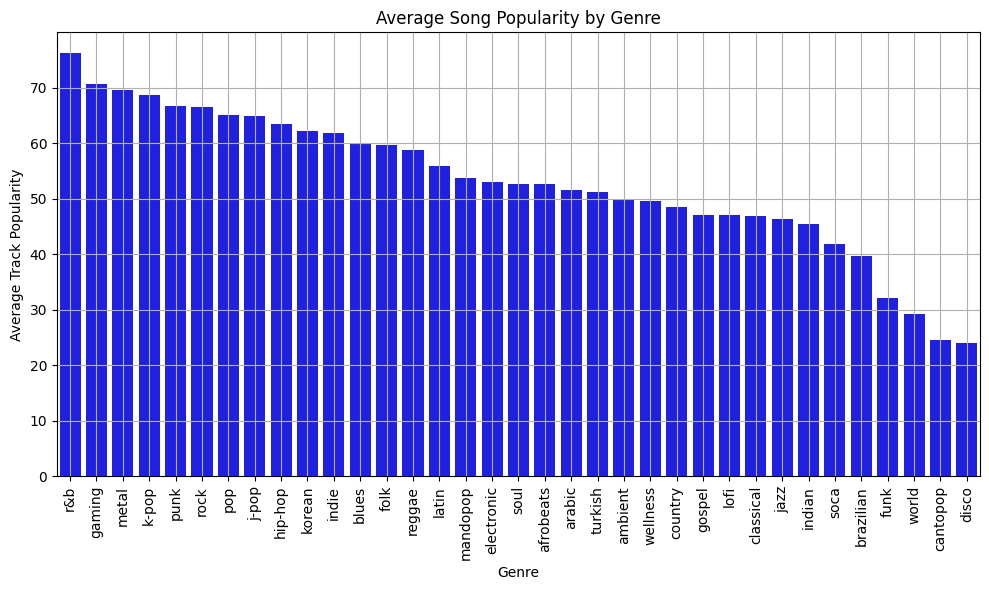

In [24]:
# Combined popularity
combined_popularity = pd.concat([high_song_popularity, low_song_popularity], ignore_index=True)

avg_popularity_by_genre = combined_popularity.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=avg_popularity_by_genre.index,
    y=avg_popularity_by_genre.values,
    color='blue'
)

plt.title('Average Song Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

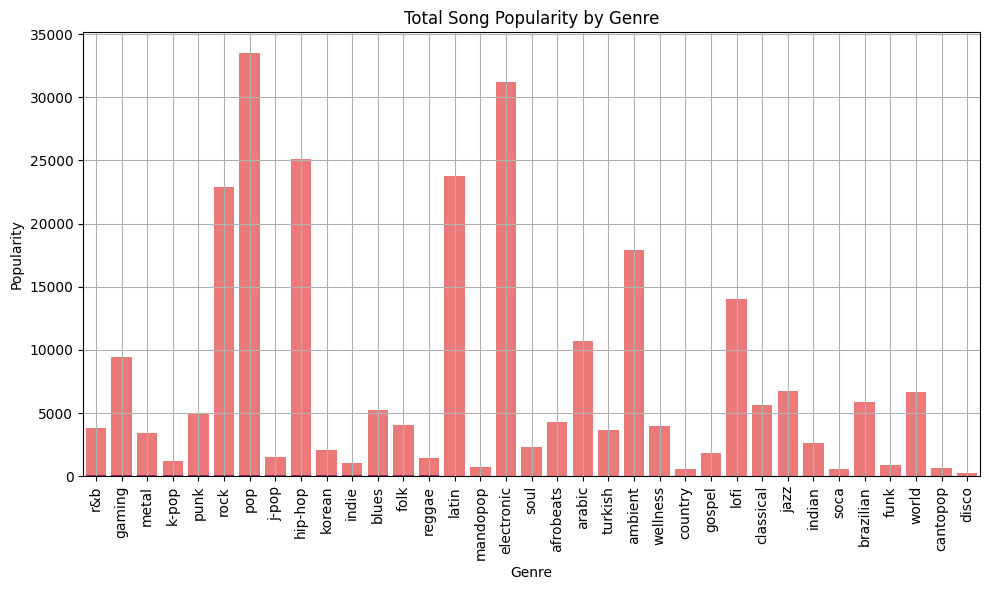

In [ ]:
total_popularity_by_genre = combined_popularity.groupby('playlist_genre')['track_popularity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

# Plot average popularity
sns.barplot(x=avg_popularity_by_genre.index, y=avg_popularity_by_genre.values, color='blue')

# Plot total popularity
sns.barplot(x=total_popularity_by_genre.index, y=total_popularity_by_genre.values, color='red', alpha=0.6)

# Add titles and labels
plt.title('Total Song Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

### Sub Genre

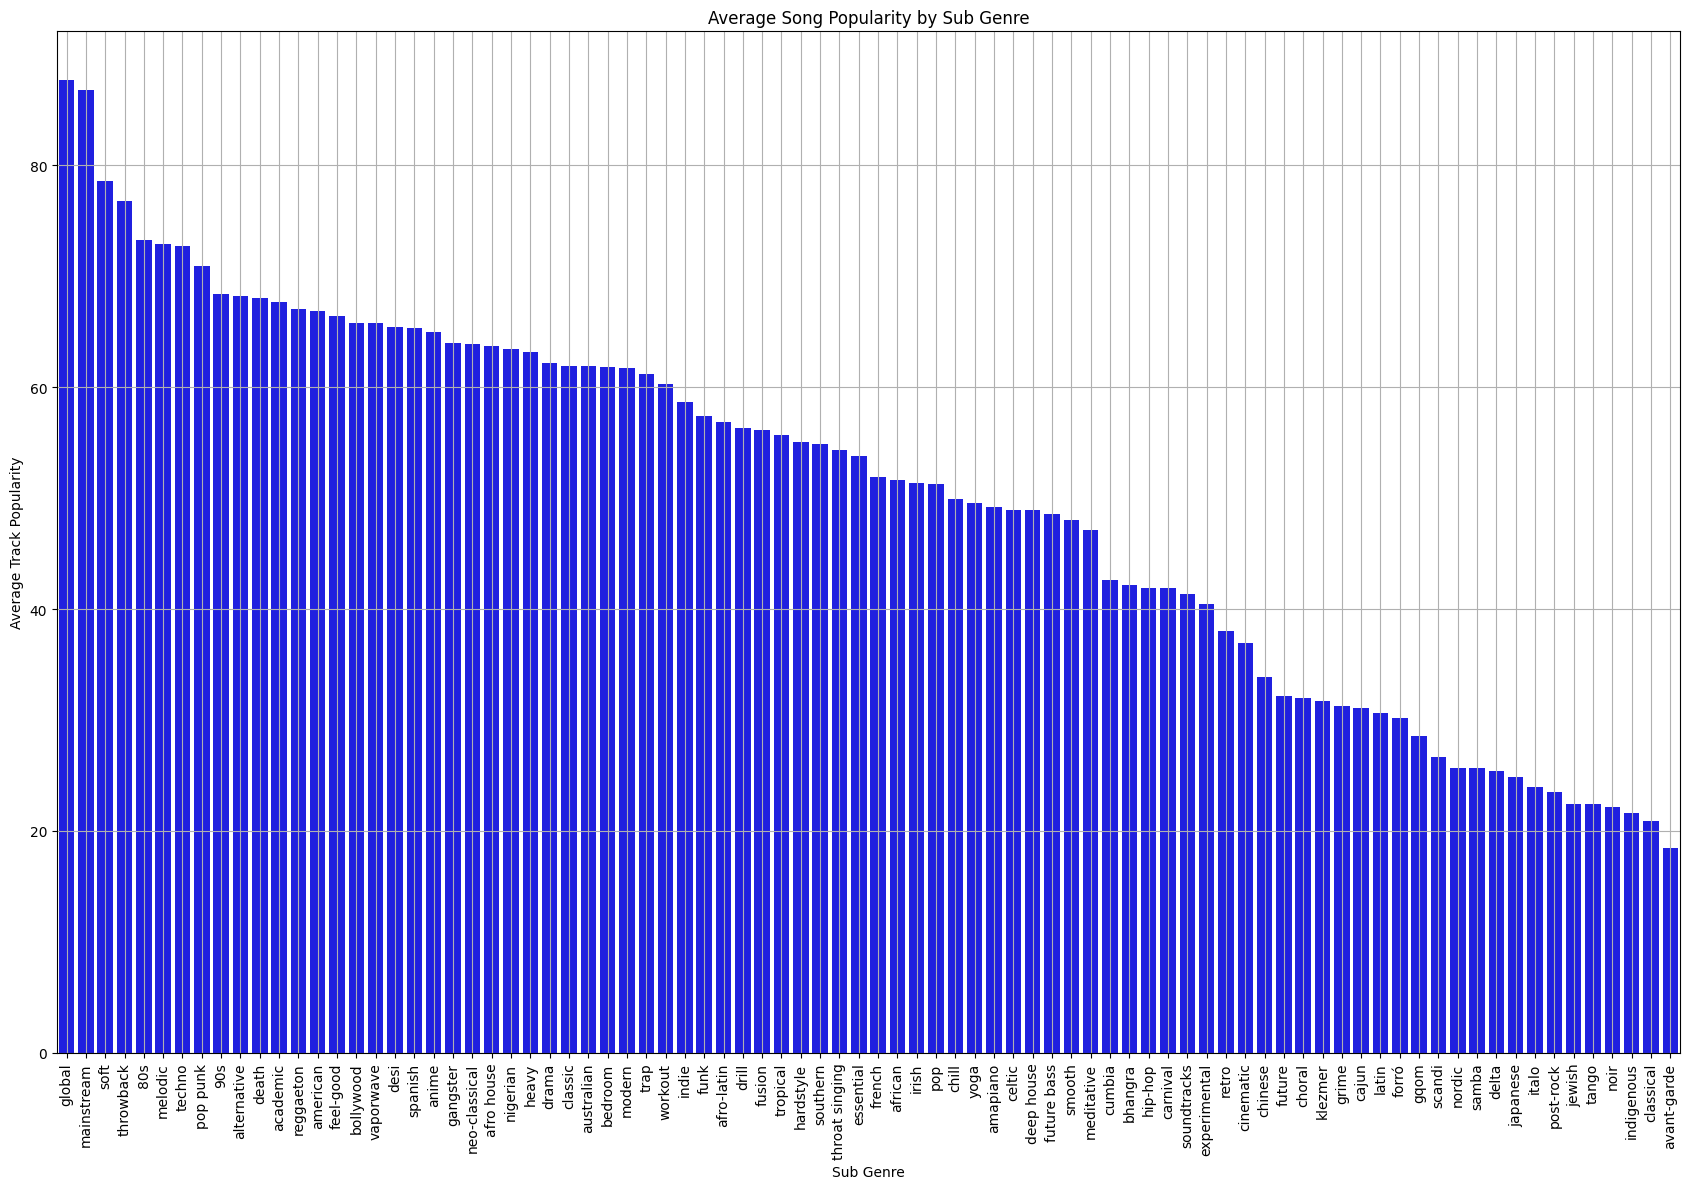

In [28]:
avg_popularity_by_subgenre = combined_popularity.groupby('playlist_subgenre')['track_popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(17, 12))
sns.barplot(
    x=avg_popularity_by_subgenre.index,
    y=avg_popularity_by_subgenre.values,
    color='blue'
)

plt.title('Average Song Popularity by Sub Genre')
plt.xlabel('Sub Genre')
plt.ylabel('Average Track Popularity')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

plt.show()

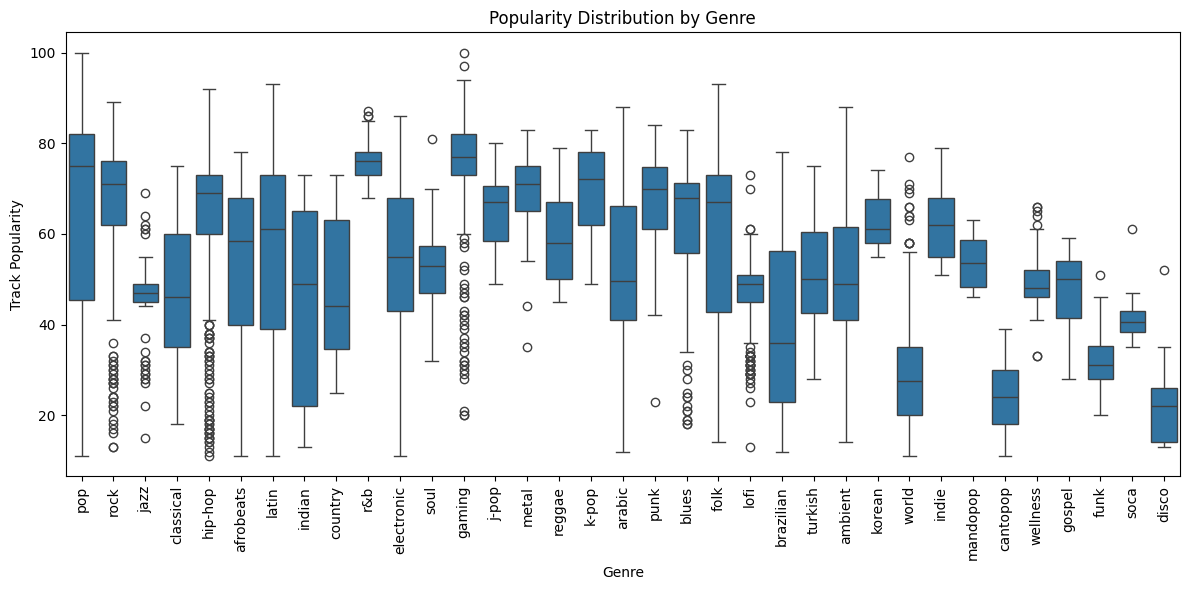

In [33]:
# Combined popularity
combined_popularity = pd.concat([high_song_popularity, low_song_popularity], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_popularity, x='playlist_genre', y='track_popularity')
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Timeline Plot

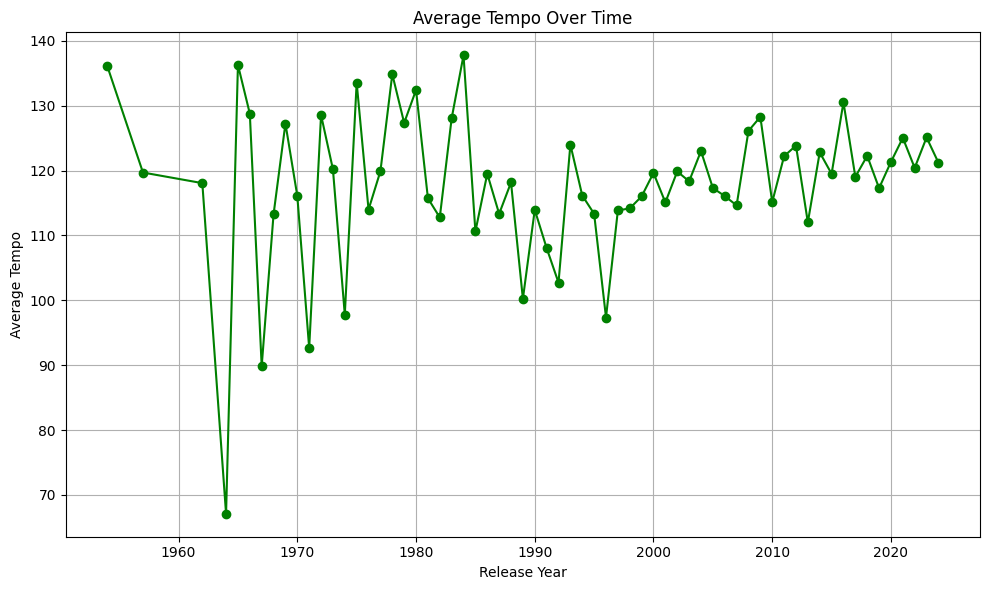

In [12]:
# Convert datetime and extract year
high_song_popularity['release_date'] = pd.to_datetime(high_song_popularity['track_album_release_date'], errors='coerce')
high_song_popularity['release_year'] = high_song_popularity['release_date'].dt.year

# Average tempo per year
avg_tempo_per_year = high_song_popularity.groupby('release_year')['tempo'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_tempo_per_year['release_year'], avg_tempo_per_year['tempo'], marker='o', color='green')
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Genre-Based Feature Averages


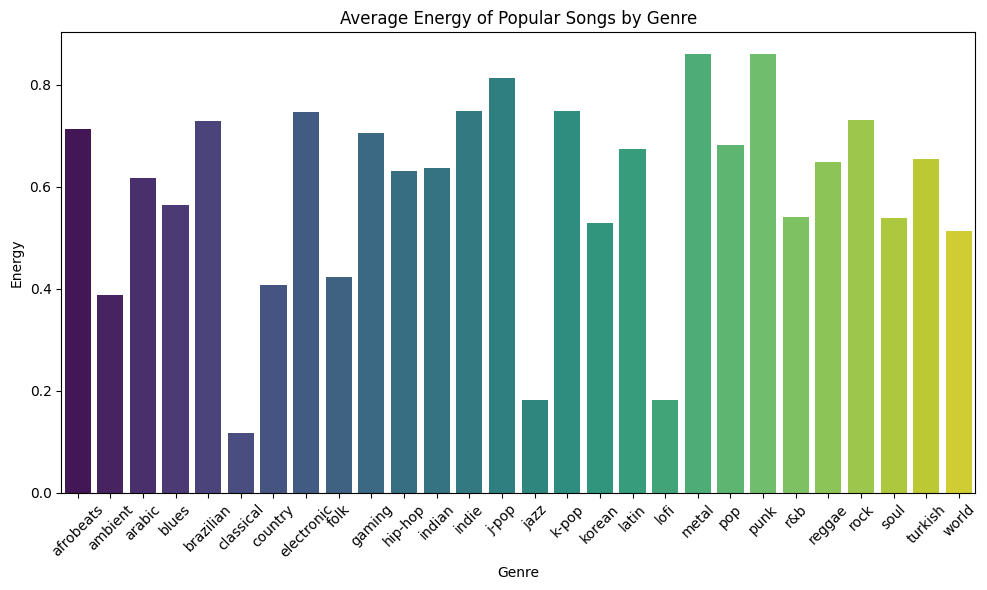

In [11]:
# Add column
high_song_popularity["popularity_label"] = "Popular"
low_song_popularity["popularity_label"] = "Non-Popular"

genre_feature_avg = high_song_popularity.groupby('playlist_genre')[['energy', 'danceability', 'loudness', 'tempo', 'valence',
    'acousticness', 'instrumentalness', 'speechiness']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_feature_avg, x='playlist_genre', y='energy', hue='playlist_genre', palette='viridis', legend=False)
plt.title('Average Energy of Popular Songs by Genre')
plt.xticks(rotation=45)
plt.ylabel('Energy')
plt.xlabel('Genre')
plt.tight_layout()


plt.show()